# Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Problem statement
We are interested in finding the mean temperature of the current day given the climate data of the previous $N$ days. 

Our data is obtained from parsing HTML of World Weather Online, with a case study of Ho Chi Minh City, Vietnam from 01/01/2009 to 21/12/2020

# 1. Preprocessing Data

### Data description

|Attribute|Explanation|Unit|
|:---:|:---:|:---:|
|**Date**|date with format `YYYY/MM/DD`|   |
|**Weather**|general description of current day's weather|categorical|
|**Mean**|mean temperature of current day, **created from `weather_full_df.csv` because `weather.csv` does not have mean temperature.** |Celcius degree (°c)|
|**Max**|maximum temperature of current day|Celcius degree (°c)|
|**Min**|minimum temperature of current day|Celcius degree (°c)|
|**Wind**|average wind speed|kilometer per hour (km/h)|
|**Direction**|direction of the wind|categorical|
|**Rain**|average amount of rainfall of current day|millimeter (mm)|
|**Humidity**|average percentage of humidity of current day|percentage (%)|
|**Cloud**|average percentage of cloudiness of current day|percentage (%)|
|**Pressure**|average amount of pressure of current day|millibar (mb)|

## 1.1. Create `mean temperature` attribute 

In [2]:
weather_full_df = pd.read_csv("weather_full_df.csv")
weather_full_df.head()

,Time,Weather,Temp,Feels,Wind,Gust,Rain,Humidity,Cloud,Pressure,Vis
0,2009-01-01 00:00:00,Fog,23 °c,25 °c,9 km/h from NNW,15 km/h,0.0 mm,97%,100%,1010 mb,Poor
1,2009-01-01 03:00:00,Light drizzle,22 °c,25 °c,9 km/h from NNW,13 km/h,0.4 mm,97%,84%,1010 mb,Poor
2,2009-01-01 06:00:00,Fog,22 °c,25 °c,6 km/h from N,8 km/h,0.0 mm,98%,100%,1011 mb,Poor
3,2009-01-01 09:00:00,Cloudy,27 °c,31 °c,6 km/h from NNE,7 km/h,0.1 mm,83%,64%,1011 mb,Excellent
4,2009-01-01 12:00:00,Partly cloudy,28 °c,34 °c,3 km/h from NE,3 km/h,0.0 mm,76%,62%,1010 mb,Excellent


In [3]:
meantemp_df = weather_full_df[['Time', 'Temp']]
meantemp_df['Time'] = pd.to_datetime(meantemp_df['Time'])
meantemp_df['Temp'] = meantemp_df['Temp'].map(lambda x: x[:-3])
meantemp_df['Temp'] = meantemp_df['Temp'].astype(int)

<ipython-input-3-7ebbc20ae91e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meantemp_df['Time'] = pd.to_datetime(meantemp_df['Time'])
<ipython-input-3-7ebbc20ae91e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meantemp_df['Temp'] = meantemp_df['Temp'].map(lambda x: x[:-3])
<ipython-input-3-7ebbc20ae91e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [4]:
meantemp_df = meantemp_df.groupby([meantemp_df['Time'].dt.date]).mean().reset_index()
meantemp_df['Time'] = pd.to_datetime(meantemp_df['Time'])
meantemp_df.columns = ['Date', 'Mean']
meantemp_df.head()

,Date,Mean
0,2009-01-01,24.500
1,2009-01-02,24.000
2,2009-01-03,22.375
3,2009-01-04,23.375
4,2009-01-05,24.875


## 1.2. Load summarized data

In [5]:
weather_df = pd.read_csv("weather.csv")

In [6]:
weather_df.head()

,Date,Weather,Max,Min,Wind,Direction,Rain,Humidity,Cloud,Pressure
0,2009-01-01,Moderate or heavy rain shower,28 °c,22 °c,6 km/h,SE,5.2 mm,89%,74%,1010 mb
1,2010-01-01,Sunny,33 °c,23 °c,5 km/h,E,0.0 mm,60%,18%,1010 mb
2,2011-01-01,Cloudy,29 °c,23 °c,4 km/h,S,0.0 mm,81%,41%,1008 mb
3,2012-01-01,Patchy rain possible,32 °c,23 °c,7 km/h,E,1.0 mm,76%,40%,1012 mb
4,2013-01-01,Partly cloudy,32 °c,23 °c,4 km/h,SE,0.0 mm,69%,15%,1010 mb


## 1.3. Preprocess

### a. Filter data: remove units in data.

In [7]:
weather_df['Max'] = weather_df['Max'].map(lambda x: x[:-3])
weather_df['Min'] = weather_df['Min'].map(lambda x: x[:-3])
weather_df['Wind'] = weather_df['Wind'].map(lambda x: x[:-5])
weather_df['Rain'] = weather_df['Rain'].map(lambda x: x[:-3])
weather_df['Humidity'] = weather_df['Humidity'].map(lambda x: x[:-1])
weather_df['Cloud'] = weather_df['Cloud'].map(lambda x: x[:-1])
weather_df['Pressure'] = weather_df['Pressure'].map(lambda x: x[:-3])

In [8]:
weather_df.head()

,Date,Weather,Max,Min,Wind,Direction,Rain,Humidity,Cloud,Pressure
0,2009-01-01,Moderate or heavy rain shower,28,22,6,SE,5.2,89,74,1010
1,2010-01-01,Sunny,33,23,5,E,0.0,60,18,1010
2,2011-01-01,Cloudy,29,23,4,S,0.0,81,41,1008
3,2012-01-01,Patchy rain possible,32,23,7,E,1.0,76,40,1012
4,2013-01-01,Partly cloudy,32,23,4,SE,0.0,69,15,1010


### b. Convert to correct type data of columns

In [9]:
# Check types
weather_df.dtypes

Date         object
Weather      object
Max          object
Min          object
Wind         object
Direction    object
Rain         object
Humidity     object
Cloud        object
Pressure     object
dtype: object

We propose converting these attributes from `object` to their equivalent datatypes:

|Attribute|Proposed datatype|
|:---:|:---:|
|**Date**|datetime|
|**Weather**|string (or object)|
|**Max**|float|
|**Min**|float|
|**Wind**|float|
|**Direction**|string (or object)|
|**Rain**|float|
|**Humidity**|float|
|**Cloud**|float|
|**Pressure**|float|

In [10]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df['Max'] = weather_df['Max'].astype(float)
weather_df['Min'] = weather_df['Min'].astype(float)
weather_df['Wind'] = weather_df['Wind'].astype(float)
weather_df['Rain'] = weather_df['Rain'].astype(float)
weather_df['Humidity'] = weather_df['Humidity'].astype(float)
weather_df['Cloud'] = weather_df['Cloud'].astype(float)
weather_df['Pressure'] = weather_df['Pressure'].astype(float)

#### Merge mean temperature into data

In [11]:
weather_df = pd.merge(meantemp_df, weather_df, how='inner')
weather_df.head()

,Date,Mean,Weather,Max,Min,Wind,Direction,Rain,Humidity,Cloud,Pressure
0,2009-01-01,24.500,Moderate or heavy rain shower,28.0,22.0,6.0,SE,5.2,89.0,74.0,1010.0
1,2009-01-02,24.000,Cloudy,28.0,21.0,9.0,NE,0.1,83.0,59.0,1011.0
2,2009-01-03,22.375,Patchy light rain,24.0,21.0,6.0,E,2.2,88.0,64.0,1012.0
3,2009-01-04,23.375,Partly cloudy,28.0,20.0,4.0,SSE,0.0,83.0,40.0,1011.0
4,2009-01-05,24.875,Partly cloudy,30.0,21.0,5.0,ESE,0.0,77.0,28.0,1011.0


In [12]:
weather_df.dtypes

Date         datetime64[ns]
Mean                float64
Weather              object
Max                 float64
Min                 float64
Wind                float64
Direction            object
Rain                float64
Humidity            float64
Cloud               float64
Pressure            float64
dtype: object

### Check brief info of data
- Shape of data
- Check NULL value 
- Check duplicated rows 

To handle NULL value, we may drop rows with NULL or replace NULL with mean value of those attribute. In our case, we choose to drop NULL values of each attribute.

To handle duplication, we simply drop duplicated rows and only keep their first occurences.

In [13]:
# Shape of data 
weather_df.shape

(4369, 11)

In [14]:
# Check NULL value
weather_df.isna().sum()

Date         0
Mean         0
Weather      0
Max          0
Min          0
Wind         0
Direction    0
Rain         0
Humidity     0
Cloud        0
Pressure     0
dtype: int64

In [15]:
# Check duplicated 
weather_df.index.duplicated().sum()

0

# 2.EDA

## 2.1.Category Type

#### Wind Direction
There are 16 direction:
- N = North (349 - 011 degrees)
- NNE = North-Northeast (012-033 degrees)
- NE = Northeast (034-056 degrees)
- ENE = East-Northeast (057-078 degrees)
- E = East (079-101 degrees)
- ESE = East-Southeast (102-123 degrees)
- SE = Southeast (124-146 degrees)
- SSE = South-Southeast (147-168 degrees)
- S = South (169-191 degrees)
- SSW = South-Southwest (192-213 degrees)
- SW = Southwest (214-236 degrees)
- WSW = West-Southwest (237-258 degrees)
- W = West (259-281 degrees)
- WNW = West-Northwest (282-303 degrees)
- NW = Northwest (304-326 degrees)
- NNW = North-Northwest (327-348 degrees)


ref: https://www7.ncdc.noaa.gov/climvis/help_wind.html

In [16]:
direction = weather_df.Direction.value_counts()
direction

WSW    694
SE     664
ESE    603
SW     526
SSE    393
E      388
SSW    330
S      249
W      220
ENE    155
WNW     66
NE      38
NW      23
NNE     12
NNW      8
Name: Direction, dtype: int64

In [17]:
weather_df.Direction.nunique()

15

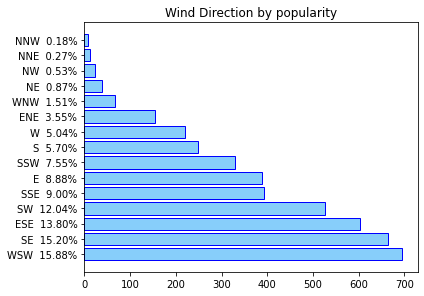

In [18]:
total = len(weather_df)
langs = direction.index
percent = direction/total*100
new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip(langs, percent)]

plt.barh(langs, direction, color='lightskyblue', edgecolor='blue')
plt.yticks(range(len(langs)), new_labels)
plt.tight_layout()
plt.title('Wind Direction by popularity')
plt.show()

##### **Conclusion about Wind Direction in Ho Chi Minh City**
- There are 15/16 wind directions in Ho Chi Minh City, and the missing direction there is **North**.
- The most popular wind directions are South-related ones: West-Southwest and Southeast
- The least popular wind directions are North-related ones: West-Northwest, Northeast, Northwest, North-Northeast, North-Northwest.

In [19]:
weather_df.groupby('Direction').agg(['mean', 'max', 'min'])

Mean                        Max                    Min        \
                mean     max     min       mean   max   min       mean   max   
Direction                                                                      
E          27.708763  32.375  22.375  32.798969  39.0  24.0  24.097938  29.0   
ENE        27.152419  32.250  22.375  32.083871  37.0  27.0  23.632258  29.0   
ESE        28.097430  33.125  22.125  33.490879  39.0  25.0  24.356551  29.0   
NE         26.348684  27.875  21.750  31.131579  34.0  22.0  22.894737  25.0   
NNE        25.479167  27.125  23.875  29.750000  35.0  25.0  22.500000  25.0   
NNW        25.421875  27.750  23.500  28.375000  32.0  25.0  23.250000  25.0   
NW         26.744565  29.625  22.875  30.043478  34.0  23.0  24.347826  27.0   
S          27.942771  33.125  22.625  32.401606  39.0  26.0  24.718876  30.0   
SE         28.504142  33.875  22.750  33.730422  39.0  23.0  24.853916  30.0   
SSE        28.583015  33.125  22.750  33.419847  39.0  24.0  25.068702  30.0   
SSW        27.832197  32.750  22.375  31.963636  39.0  25.0  24.890909  29.0   
SW         27.808698  32.500  22.000  31.562738  36.0  23.0  25.024715  30.0   
W          27.146591  30.625  21.250  30.750000  36.0  22.0  24.540909  28.0   
WNW        27.087121  30.375  21.375  30.696970  35.0  25.0  24.318182  28.0   
WSW        27.412644  32.250  23.250  31.126801  36.0  24.0  24.731988  30.0   

                      Wind  ... Rain   Humidity                  Cloud         \
            min       mean  ...  min       mean   max   min       mean    max   
Direction                   ...                                                 
E          18.0   8.479381  ...  0.0  68.211340  93.0  45.0  28.628866   79.0   
ENE        18.0   7.677419  ...  0.0  69.316129  87.0  47.0  30.522581   69.0   
ESE        18.0   9.427861  ...  0.0  67.505804  94.0  44.0  26.781095   79.0   
NE         21.0   7.947368  ...  0.0  71.447368  90.0  49.0  31.789474   74.0   
NNE        21.0  10.583333  ...  0.0  73.500000  91.0  50.0  42.416667   86.0   
NNW        21.0  11.625000  ...  0.0  81.875000  95.0  72.0  52.125000   83.0   
NW         21.0   9.086957  ...  0.0  81.695652  96.0  70.0  53.000000  100.0   
S          19.0   7.289157  ...  0.0  74.755020  97.0  52.0  38.104418   85.0   
SE         18.0   9.882530  ...  0.0  68.240964  94.0  48.0  30.394578   87.0   
SSE        18.0   8.078880  ...  0.0  70.269720  95.0  49.0  35.941476   88.0   
SSW        18.0   7.463636  ...  0.0  77.963636  97.0  54.0  42.593939   84.0   
SW         18.0   9.266160  ...  0.0  80.197719  96.0  57.0  46.357414   92.0   
W          19.0   9.554545  ...  0.0  81.581818  96.0  57.0  49.545455   93.0   
WNW        18.0   8.863636  ...  0.0  79.757576  94.0  62.0  49.984848   80.0   
WSW        16.0  10.881844  ...  0.0  81.314121  97.0  57.0  48.966859   99.0   

                    Pressure                  
            min         mean     max     min  
Direction                                     
E           0.0  1010.847938  1016.0  1007.0  
ENE         3.0  1011.464516  1017.0  1007.0  
ESE         1.0  1010.601990  1016.0  1006.0  
NE         10.0  1011.157895  1015.0  1008.0  
NNE         5.0  1011.166667  1014.0  1007.0  
NNW        10.0  1009.125000  1012.0  1007.0  
NW         21.0  1008.739130  1011.0  1005.0  
S           4.0  1009.345382  1016.0  1006.0  
SE          0.0  1010.106928  1016.0  1005.0  
SSE         2.0  1009.567430  1015.0  1005.0  
SSW         1.0  1008.775758  1016.0  1004.0  
SW          2.0  1008.150190  1014.0  1004.0  
W           5.0  1007.795455  1015.0  1002.0  
WNW        21.0  1008.257576  1014.0  1005.0  
WSW         6.0  1007.626801  1013.0  1003.0  

[15 rows x 24 columns]

#### Weather

In [20]:
weather = weather_df.Weather.value_counts()
weather

Partly cloudy                     1037
Moderate or heavy rain shower     1010
Patchy rain possible               581
Light rain shower                  546
Sunny                              385
Cloudy                             248
Torrential rain shower             165
Patchy light rain with thunder      98
Thundery outbreaks possible         84
Overcast                            75
Patchy light drizzle                26
Mist                                23
Moderate rain at times              21
Patchy light rain                   19
Light rain                          14
Moderate rain                       12
Light drizzle                       10
Heavy rain                           6
Fog                                  5
Heavy rain at times                  4
Name: Weather, dtype: int64

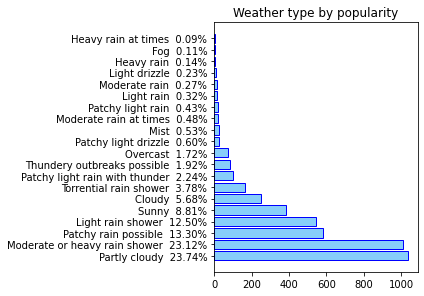

In [21]:
total = len(weather_df)
langs = weather.index
percent = weather/total*100
new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip(langs, percent)]

plt.barh(langs, weather, color='lightskyblue', edgecolor='blue')
plt.yticks(range(len(langs)), new_labels)
plt.tight_layout()
plt.title('Weather type by popularity')
plt.show()

##### Remarks about general weather in Ho Chi Minh City
- The most popular weather are Partly cloudy and Moderate or heavy rain shower
- Patchy rain, light rain shower and sunny also usually appear

In [22]:
weather_df.groupby('Weather').agg('mean').sort_values(by = "Mean")

,Mean,Max,Min,Wind,Rain,Humidity,Cloud,Pressure
Weather,,,,,,,,
Heavy rain,24.604167,25.833333,23.666667,14.333333,55.550000,90.333333,82.666667,1007.666667
Moderate rain,24.708333,26.250000,23.416667,9.250000,8.166667,89.833333,68.833333,1008.833333
Light rain,25.535714,28.071429,23.857143,9.000000,3.250000,84.642857,66.857143,1008.857143
Patchy light rain,25.552632,27.631579,23.684211,8.842105,5.468421,88.736842,62.736842,1008.473684
Fog,25.600000,28.200000,23.600000,6.600000,1.000000,93.000000,73.200000,1007.000000
Mist,25.750000,29.000000,23.173913,8.478261,1.343478,88.217391,54.956522,1007.956522
Light drizzle,25.825000,28.600000,23.500000,9.800000,2.120000,85.300000,62.900000,1008.300000
Patchy light drizzle,25.875000,29.192308,23.384615,8.423077,1.100000,80.384615,52.461538,1009.269231
Moderate rain at times,27.166667,30.380952,24.142857,9.142857,4.004762,76.761905,60.904762,1009.142857


## 2.2.Numeric Type

In [23]:
weather_df.describe()

,Mean,Max,Min,Wind,Rain,Humidity,Cloud,Pressure
count,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000,4369.000000
mean,27.864929,32.385901,24.637446,9.160906,3.537835,73.963149,37.939574,1009.325933
std,1.708788,2.420124,1.761131,3.404905,6.243244,10.396567,18.932319,2.092956
min,21.250000,22.000000,16.000000,2.000000,0.000000,44.000000,0.000000,1002.000000
25%,26.750000,31.000000,24.000000,7.000000,0.000000,66.000000,24.000000,1008.000000
50%,27.750000,32.000000,25.000000,9.000000,1.300000,75.000000,36.000000,1009.000000
75%,29.000000,34.000000,26.000000,11.000000,4.800000,82.000000,51.000000,1011.000000
max,33.875000,39.000000,30.000000,26.000000,136.700000,97.000000,100.000000,1017.000000


<ipython-input-24-cf0d4d6e6ce8>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  weather_df.hist(ax = ax);


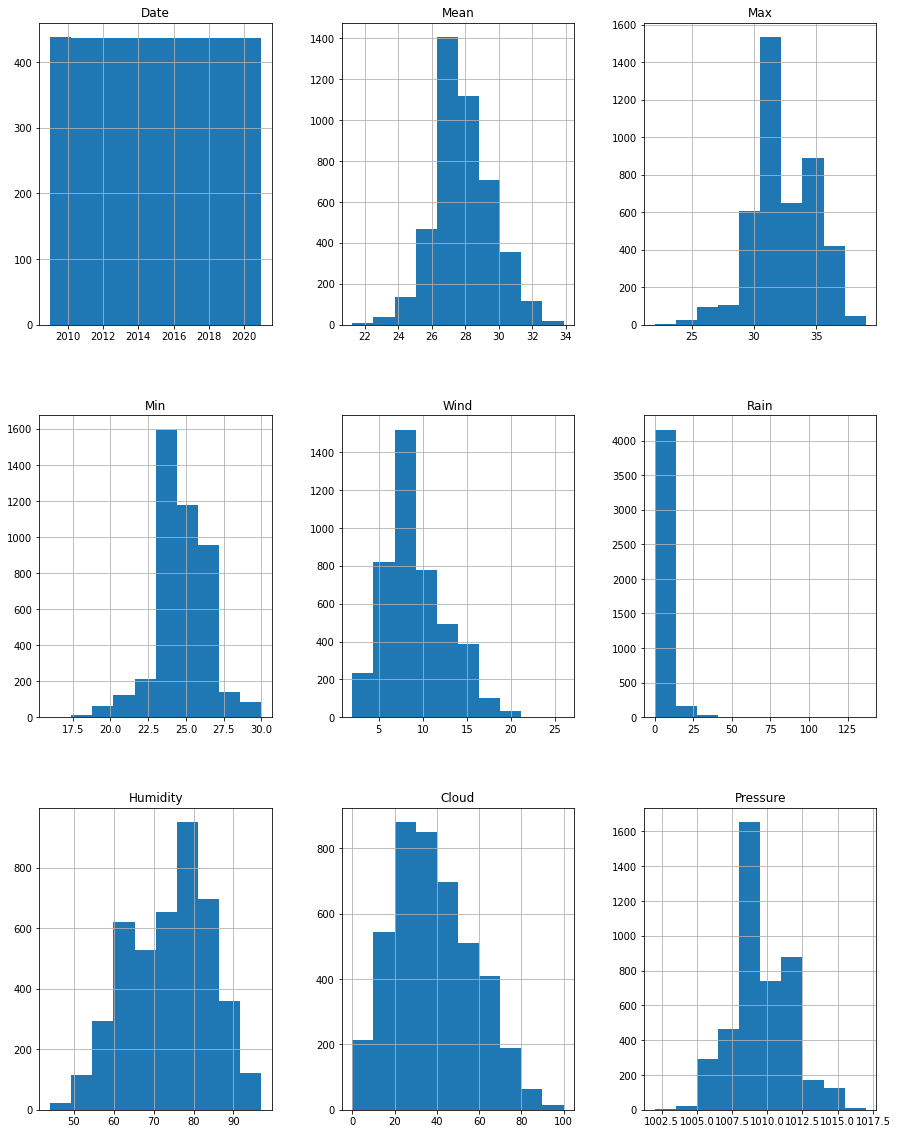

In [24]:
# Histogram of Numeric Columns
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
weather_df.hist(ax = ax);

count    4369.000000
mean        7.748455
std         2.220067
min         0.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        15.000000
dtype: float64

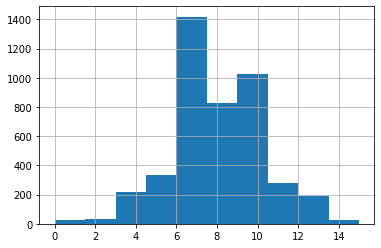

In [25]:
# Difference between max and min of temperature in a day 
delta_temp = (weather_df.Max - weather_df.Min)
delta_temp.hist()
delta_temp.describe()

**Remark**
- The difference between max and min temperature in HCMC is fairly high, mostly around 6-10°c
- **Rain distribution is heavily left-skewed so we will apply *log transformation***

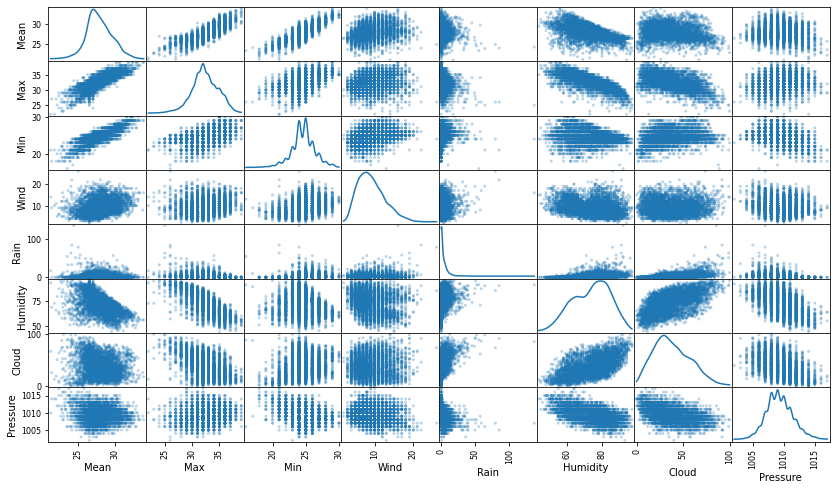

In [26]:
# Produce a scatter plots matrix for each pair of features in the data
pd.plotting.scatter_matrix(weather_df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

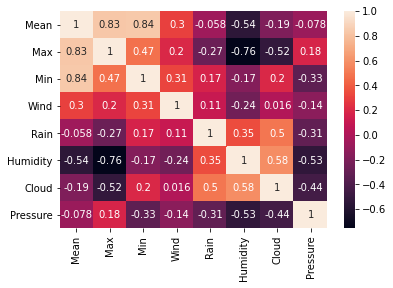

In [27]:
sns.heatmap(weather_df.corr(), annot=True);

Visualize timeseries pattern of 8 numeric attributes by monthly frequency

In [28]:
features  = ['Mean', 'Max', 'Min', 'Wind', 'Rain', 'Humidity', 'Cloud', 'Pressure']

In [29]:
weather_df = weather_df.set_index('Date')
weather_df.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-19', '2020-12-20'],
              dtype='datetime64[ns]', name='Date', length=4369, freq=None)

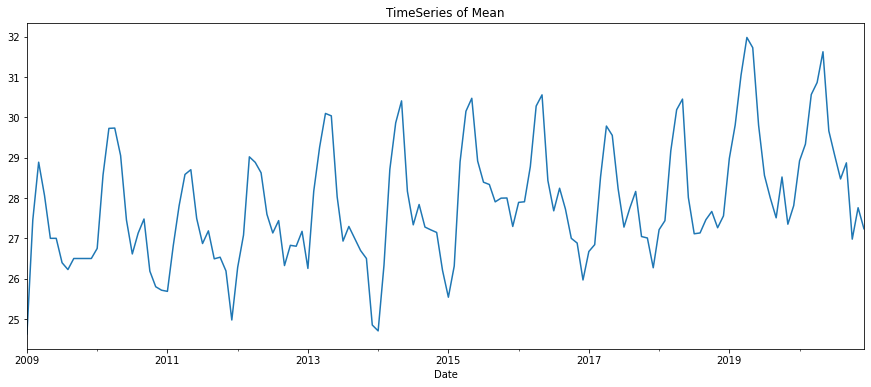

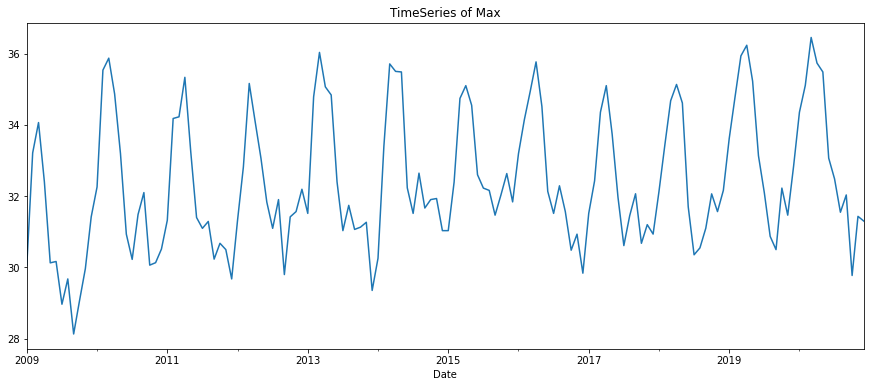

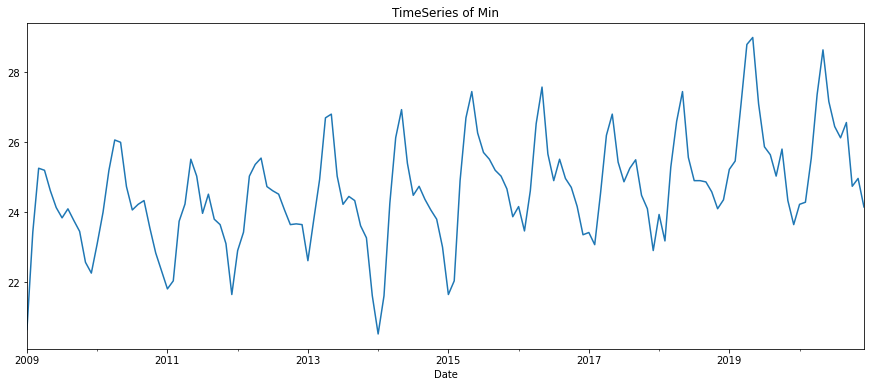

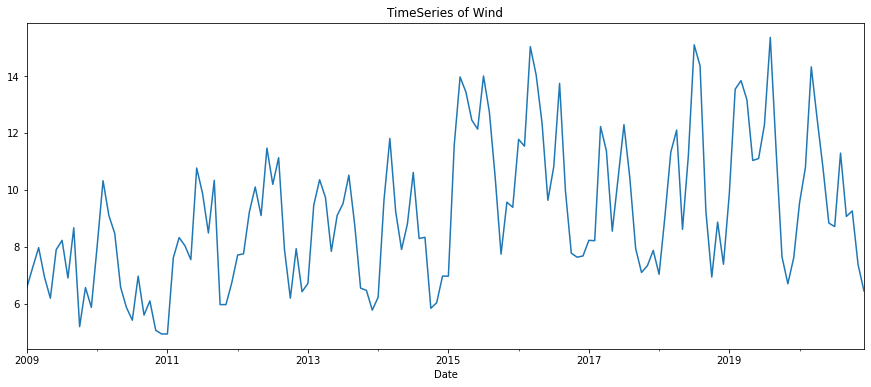

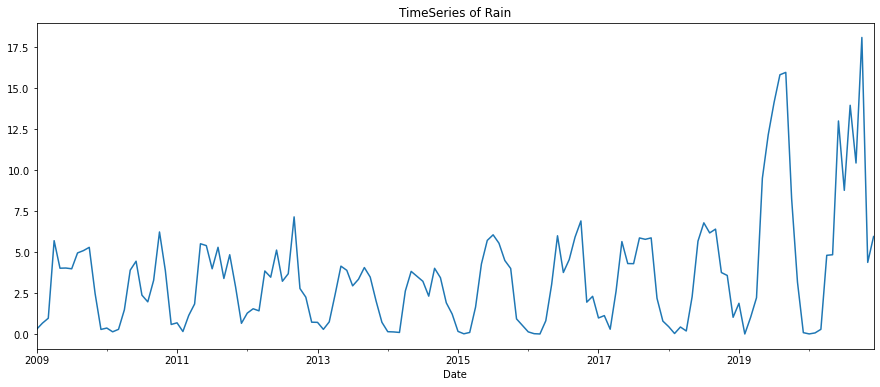

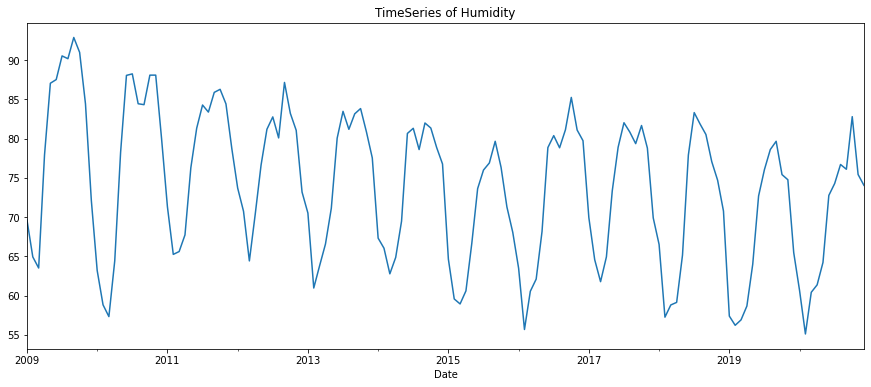

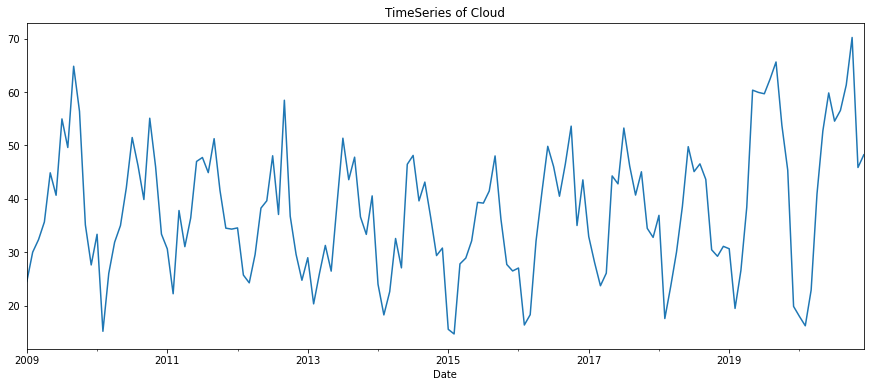

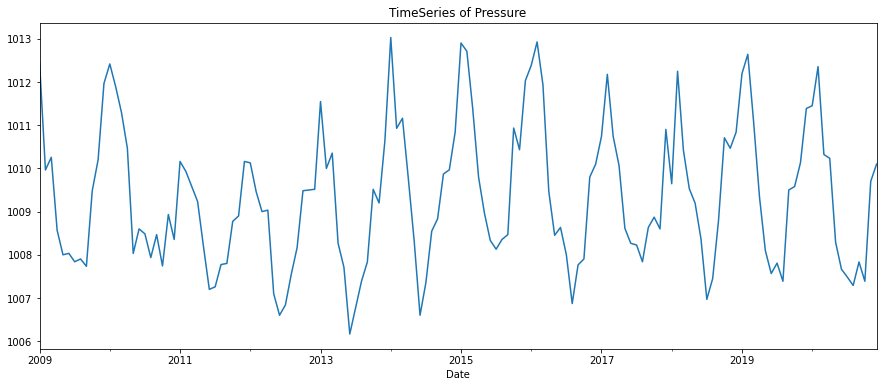

In [30]:
# weather_df.Mean[2017:].plot()
# how = 'MS' => MS: month start frequency
for feature in features:
  y = weather_df[feature].resample('MS').mean()
  y.plot(figsize=(15, 6))
  plt.title("TimeSeries of %s"%feature)
  plt.show()

#### Remarks
- Histogram of all columns are normal, except Rain column. Rain distribution of HCMC is left-skewed so we apply log transformation to `rain` attribute
- Diferrence of max and min of temperature in a day of HCM mostly ranges from 6 to 10°C.
- Some significant correlations:
    - `Mean` bears a strongly positive relationship with max and min temperature and have a moderately negative relationship with cloudiness. 
    - `Wind` bears a weakly to moderately positive relationship with the three attributes of temperature, while `humidity` somewhat negatively correlates with them.
    - `Cloud` correlates with rain and humidity in a moderate and positive way.
    - `Pressure` bears a moderately negative relationship with humidity, rain and cloudiness, which conforms to physical properties of pressure. In physics, low pressure enables the air mass to hold more water at high altitudes *(increase relative humidity)* and hence is more likely to *form clouds and cause rainfall*.

- **Note**: Our choice of correlation coefficient threshold derives from the paper cited in the references:
    - $0$: no linear relationship
    - $1$: perfect (+/-) linear relationship
    - $(0; 0.3)$: weak (+/-) linear relationship
    - $[0.3; 0.7)$: moderate (+/-) linear relationship
    - $[0.7; 1)$: strong (+/-) linear relationship
    
- All numerical values follow pattern by half a year.

# 3. Model

## 3.1. Data preparation

#### Feature selection

In [31]:
features  = ['Mean', 'Max', 'Min', 'Wind', 'Rain', 'Humidity', 'Cloud', 'Pressure']

In [32]:
prediction_features = ['Mean_1', 'Mean_2', 'Mean_3', 'Max_1', 'Max_2', 'Max_3', 'Min_1',
       'Min_2', 'Min_3', 'Wind_1', 'Wind_2', 'Wind_3', 'Rain_1', 'Rain_2',
       'Rain_3', 'Humidity_1', 'Humidity_2', 'Humidity_3', 'Cloud_1',
       'Cloud_2', 'Cloud_3', 'Pressure_1', 'Pressure_2', 'Pressure_3']

In [33]:
df = weather_df[features]
df.head()

,Mean,Max,Min,Wind,Rain,Humidity,Cloud,Pressure
Date,,,,,,,,
2009-01-01,24.500,28.0,22.0,6.0,5.2,89.0,74.0,1010.0
2009-01-02,24.000,28.0,21.0,9.0,0.1,83.0,59.0,1011.0
2009-01-03,22.375,24.0,21.0,6.0,2.2,88.0,64.0,1012.0
2009-01-04,23.375,28.0,20.0,4.0,0.0,83.0,40.0,1011.0
2009-01-05,24.875,30.0,21.0,5.0,0.0,77.0,28.0,1011.0


#### Extract features
We propose to use climate information of the past $N$ days to predict mean temperature of the current day. 

In [34]:
def extract_feature_nth_day(df, feature, N):
    rows = df.shape[0]
    nth_prior_meassurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_meassurements

In our project, we choose $N=3$

In [35]:
for feature in features:
    for N in range(1, 4):
        extract_feature_nth_day(df, feature, N)

<ipython-input-34-912509aac4bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = nth_prior_meassurements


In [36]:
df.head()

,Mean,Max,Min,Wind,Rain,Humidity,Cloud,Pressure,Mean_1,Mean_2,...,Rain_3,Humidity_1,Humidity_2,Humidity_3,Cloud_1,Cloud_2,Cloud_3,Pressure_1,Pressure_2,Pressure_3
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,24.500,28.0,22.0,6.0,5.2,89.0,74.0,1010.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,24.000,28.0,21.0,9.0,0.1,83.0,59.0,1011.0,24.500,NaN,...,NaN,89.0,NaN,NaN,74.0,NaN,NaN,1010.0,NaN,NaN
2009-01-03,22.375,24.0,21.0,6.0,2.2,88.0,64.0,1012.0,24.000,24.500,...,NaN,83.0,89.0,NaN,59.0,74.0,NaN,1011.0,1010.0,NaN
2009-01-04,23.375,28.0,20.0,4.0,0.0,83.0,40.0,1011.0,22.375,24.000,...,5.2,88.0,83.0,89.0,64.0,59.0,74.0,1012.0,1011.0,1010.0
2009-01-05,24.875,30.0,21.0,5.0,0.0,77.0,28.0,1011.0,23.375,22.375,...,0.1,83.0,88.0,83.0,40.0,64.0,59.0,1011.0,1012.0,1011.0


When we investigate the number of null values, we find that it is much smaller than the total number of samples so we decide to drop them

In [37]:
df.isnull().sum()

Mean          0
Max           0
Min           0
Wind          0
Rain          0
Humidity      0
Cloud         0
Pressure      0
Mean_1        1
Mean_2        2
Mean_3        3
Max_1         1
Max_2         2
Max_3         3
Min_1         1
Min_2         2
Min_3         3
Wind_1        1
Wind_2        2
Wind_3        3
Rain_1        1
Rain_2        2
Rain_3        3
Humidity_1    1
Humidity_2    2
Humidity_3    3
Cloud_1       1
Cloud_2       2
Cloud_3       3
Pressure_1    1
Pressure_2    2
Pressure_3    3
dtype: int64

In [38]:
df_filtered = df[prediction_features + ["Mean"]]
df_filtered = df_filtered.dropna()

#### Mini EDA

In [39]:
df_filtered.corr()[['Mean']].sort_values('Mean')

,Mean
Humidity_1,-0.505245
Humidity_2,-0.484450
Humidity_3,-0.478152
Cloud_1,-0.144927
Cloud_2,-0.106260
Cloud_3,-0.085887
Pressure_1,-0.052377
Pressure_2,-0.048324
Pressure_3,-0.047369
Rain_1,-0.040217


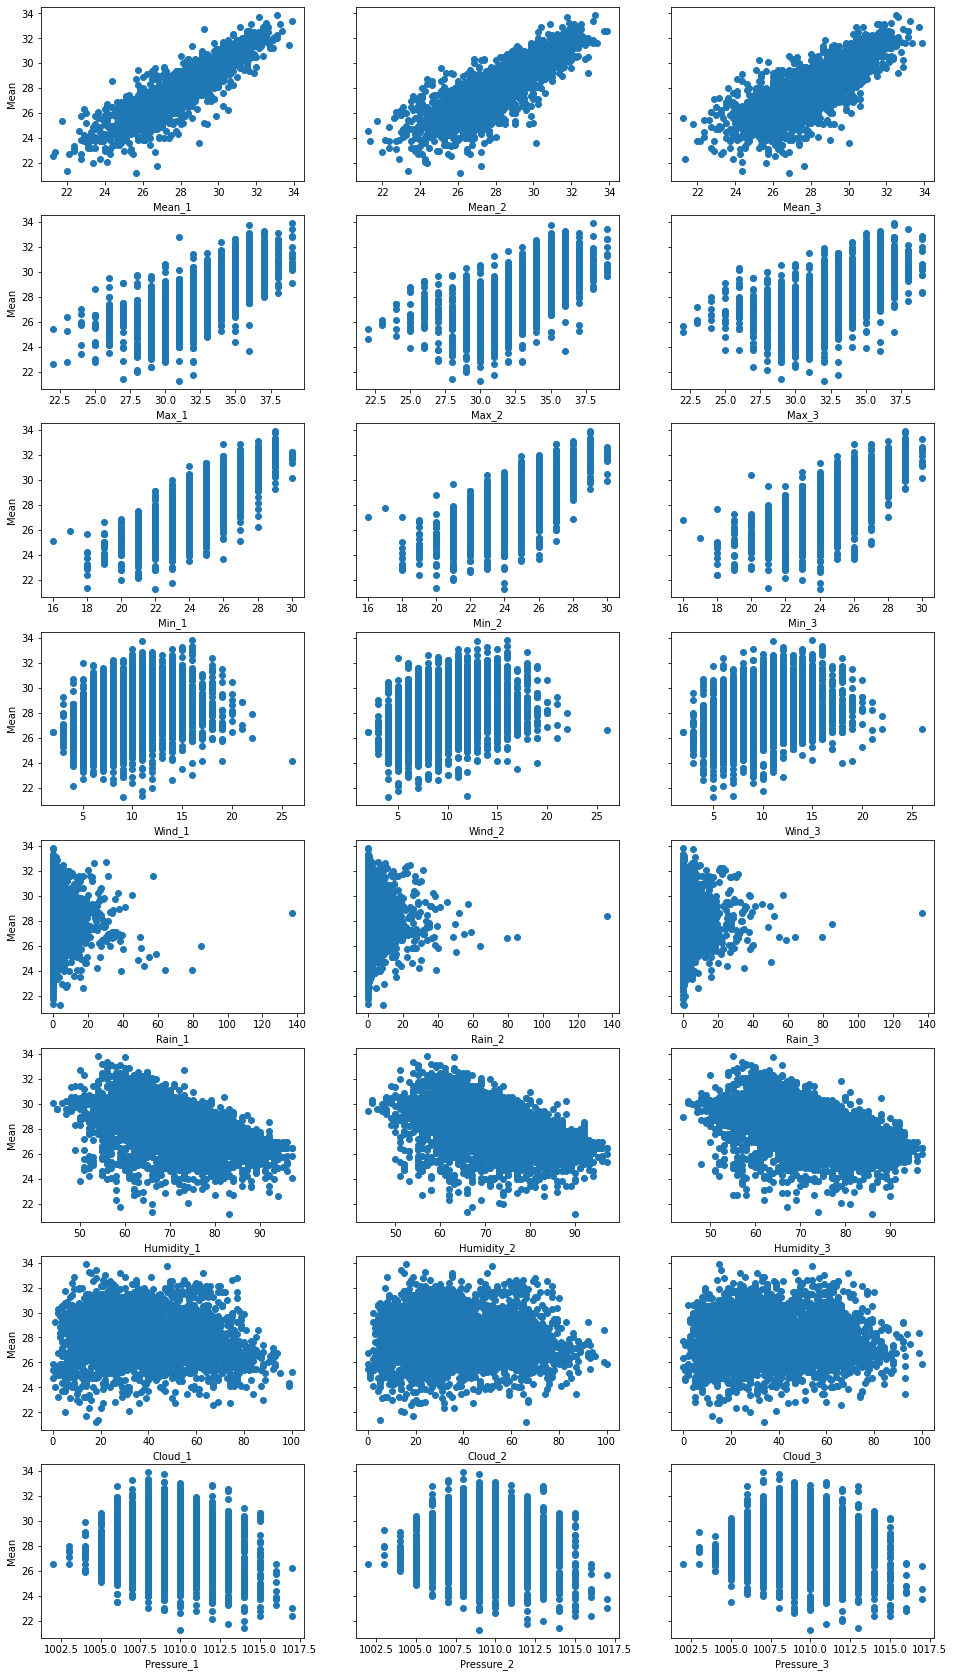

In [40]:
plt.rcParams['figure.figsize'] = [16, 30]
fig, axes = plt.subplots(nrows=8, ncols=3, sharey=True)
arr = np.array(prediction_features).reshape(8, 3)
for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df_filtered[feature], df_filtered['Mean'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='Mean')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

### Apply log transformation for skewed attributes

In [41]:
from scipy.stats import skew
df_filtered_skew = df_filtered.apply(lambda x: skew(x.dropna()))
df_filtered_skew = df_filtered_skew[df_filtered_skew > 0.75]

# apply log + 1 transformation for all numeric features with skewness over 0.75
df_filtered[df_filtered_skew.index] = np.log1p(df_filtered[df_filtered_skew.index])

#### Split data
We split data train and test by day 01/04/2019, which means the data between 01/01/2009 and 01/04/2019 is used for training and the remaining is used for testing.

The choice of 01/04/2019 decides the ratio of training to testing approximates $85:15$

In [42]:
data_train = df_filtered[df_filtered.index < dt.datetime(2019,4,1)]
data_test = df_filtered[df_filtered.index >= dt.datetime(2019,4,1)]

In [43]:
X_train, y_train = data_train[prediction_features], data_train['Mean']
X_test, y_test = data_test[prediction_features], data_test['Mean']

In [44]:
X_train.head()

,Mean_1,Mean_2,Mean_3,Max_1,Max_2,Max_3,Min_1,Min_2,Min_3,Wind_1,...,Rain_3,Humidity_1,Humidity_2,Humidity_3,Cloud_1,Cloud_2,Cloud_3,Pressure_1,Pressure_2,Pressure_3
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-04,22.375,24.000,24.500,24.0,28.0,28.0,21.0,21.0,22.0,6.0,...,1.824549,88.0,83.0,89.0,64.0,59.0,74.0,1012.0,1011.0,1010.0
2009-01-05,23.375,22.375,24.000,28.0,24.0,28.0,20.0,21.0,21.0,4.0,...,0.095310,83.0,88.0,83.0,40.0,64.0,59.0,1011.0,1012.0,1011.0
2009-01-06,24.875,23.375,22.375,30.0,28.0,24.0,21.0,20.0,21.0,5.0,...,1.163151,77.0,83.0,88.0,28.0,40.0,64.0,1011.0,1011.0,1012.0
2009-01-07,25.500,24.875,23.375,31.0,30.0,28.0,22.0,21.0,20.0,5.0,...,0.000000,77.0,77.0,83.0,28.0,28.0,40.0,1011.0,1011.0,1011.0
2009-01-08,25.625,25.500,24.875,31.0,31.0,30.0,23.0,22.0,21.0,5.0,...,0.000000,81.0,77.0,77.0,28.0,28.0,28.0,1012.0,1011.0,1011.0


In [45]:
y_train.head(5)

Date
2009-01-04    23.375
2009-01-05    24.875
2009-01-06    25.500
2009-01-07    25.625
2009-01-08    24.375
Name: Mean, dtype: float64

## 3.2. Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [48]:
lr_pred[:5]

array([30.2030919 , 30.94749383, 31.39872962, 30.81501804, 29.89770902])

In [49]:
print(f"Training r-squared score of Linear regression: {lr.score(X_train, y_train)}")

Training r-squared score of Linear regression: 0.8428468658658179


In [50]:
print(f"Testing r-squared score of Linear regression: {lr.score(X_test, y_test)}")

Testing r-squared score of Linear regression: 0.7589852842782941


## 3.3. SVM
We will use SVR (Support Vector Regression) for regression problems
- After some experiments, we find out that using an SVR with `rbf kernel` yields the best result.
- More details of our benchmarks can be found in Column 6. Appendix

In [51]:
from sklearn.svm import SVR

In [52]:
svr = SVR(kernel='rbf', C=1e2, gamma=0.0001)
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [53]:
svr_pred[:5]

array([30.61710568, 30.91969063, 30.95169168, 31.10658418, 29.67517371])

In [54]:
print(f"Training r-squared score of SVR with polynomial kernel: {svr.score(X_train, y_train)}")

Training r-squared score of SVR with polynomial kernel: 0.8608176766971465


In [55]:
print(f"Testing r-squared score of SVR with polynomial kernel: {svr.score(X_test, y_test)}")

Testing r-squared score of SVR with polynomial kernel: 0.7654686132245159


## 3.4. Ensemble Model
We create an ensemble model of the above models: Linear Regression and SVR with the hope of improving our prediction scores

In [56]:
class EnsembleModel:
    def __init__(self):
        self.model1 = LinearRegression()
        self.model2 = SVR(kernel='rbf', C=1e2, gamma=0.0001)

    def fit(self, X, y):
        self.model1.fit(X, y)
        self.model2.fit(X, y)    
  
    def predict(self, X):
        pred1 = self.model1.predict(X)
        pred2 = self.model2.predict(X)
        pred = (pred1 + pred2)/2
        return pred

In [57]:
ensemble_model = EnsembleModel()
ensemble_model.fit(X_train, y_train)
ens_pred = ensemble_model.predict(X_test)

In [58]:
ens_pred[:5]

array([30.41009879, 30.93359223, 31.17521065, 30.96080111, 29.78644136])

## 3.5 Other models

Some other experiments we have conducted do not give good results, so we include them in the appendix column **(Chap 6)** for the purpose of benchmarking only

# 4. Evaluation

We will use 4 main regression model evaluation metrics to assess prediction error rates and model performance:
- MAE (mean absolute error)
- MSE (mean squared error)
- RMSE (root mean squared error)
- R-squared (coefficient of determination): how well the predicted values fit the ground truths. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [59]:
import sklearn.metrics as metrics
def evaluation(obs, prediction):
    mse = metrics.mean_squared_error(obs, prediction)
    rmse = metrics.mean_squared_error(obs, prediction, squared=False)
    mae = metrics.mean_absolute_error(obs, prediction)
    r_square = metrics.r2_score(obs, prediction)
    print("Mean Square Error: %0.3f" %mse)
    print("Root Mean Square Error: %0.3f" %rmse)
    print("Mean Absolute Error: %0.3f" %mae)
    print("R2 score: %0.3f" %r_square)

In [60]:
# Linear Regression 
print("== Linear regression ==")
evaluation(y_test, lr_pred)

== Linear regression ==
Mean Square Error: 0.827
Root Mean Square Error: 0.910
Mean Absolute Error: 0.670
R2 score: 0.759


In [61]:
# SVM 
print("== SVR ==")
evaluation(y_test, svr_pred)

== SVR ==
Mean Square Error: 0.805
Root Mean Square Error: 0.897
Mean Absolute Error: 0.660
R2 score: 0.765


In [62]:
# Ensemble Model
print("== Ensemble model ==")
evaluation(y_test, ens_pred)

== Ensemble model ==
Mean Square Error: 0.803
Root Mean Square Error: 0.896
Mean Absolute Error: 0.660
R2 score: 0.766


### Test case

In [63]:
print(f"Choose a test case: {pd.to_datetime(X_test.iloc[-1].name).date()}")

Choose a test case: 2020-12-20


In [64]:
test_case = [X_test.iloc[-1]]
print(f"Predicted mean temperature of Linear Regression: {lr.predict(test_case).item():.2f} °c")
print(f"Predicted mean temperature of SVR: {svr.predict(test_case).item():.2f} °c")
print(f"Predicted mean temperature of Ensemble: {ensemble_model.predict(test_case).item():.2f} °c")
print(f"Real mean temperature of {pd.to_datetime(X_test.iloc[-1].name).date()}: {y_test.iloc[-1]:.2f} °c")

Predicted mean temperature of Linear Regression: 27.58 °c
Predicted mean temperature of SVR: 27.59 °c
Predicted mean temperature of Ensemble: 27.59 °c
Real mean temperature of 2020-12-20: 26.50 °c


# 5. Conclusion

- In our project, we have collected data with HTML parsing, cleaned, transformed and extracted some insights of weather in Ho Chi Minh City and climate data in general:
    - The rain distribution is left-skewed, which denotes it does not tend to rain too heavily in HCM City. We apply log transformation to handle skewness problem, which improves the R2 score by a margin of 0.02 and reduced MSE by 0.07 compared to the baseline (when skewness is not handled)
    
    - The difference between maximum and minimum temperature of a day in HCMC is fairly high and mostly ranges from 6 to 10°C
    
    - Pressure, cloudiness, rainfall and humidity follow the law of physics. Higher percentage of cloud coverness strongly correlates the overall temperature. 


- In terms of data modelling, we have experimented 5 types of machine learning models for temperature prediction and selected 3 models with the most optimal performance. The best estimator for SVR was found using GridSearch, which can be found in the appendix column. Our ensemble model achieved an **R2 score of 0.766** and **MSE of 0.803**.

# 6. Appendix

**Note:** A negative value of R2-score indicates a bad model, the closer to -1 the worse our model is

### 6.1 SVR with rbf kernel

In [65]:
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)

svr_rbf.fit(X_train, y_train)
svr_rbf_pred = svr_rbf.predict(X_test)

In [66]:
print(f"Training r-squared score of SVR with rbf kernel: {svr_rbf.score(X_train, y_train)}")
print(f"Testing r-squared score of SVR with rbf kernel: {svr_rbf.score(X_test, y_test)}")

Training r-squared score of SVR with rbf kernel: 0.9961657221075619
Testing r-squared score of SVR with rbf kernel: -0.600410331813845


### 6.2 SVR with sigmoid kernel

In [67]:
svr_sigmoid = SVR(kernel='sigmoid', C=1e4, gamma=0.1)

svr_sigmoid.fit(X_train, y_train)
svr_sigmoid_pred = svr_sigmoid.predict(X_test)

In [68]:
print(f"Training r-squared score of SVR with sigmoid kernel: {svr_sigmoid.score(X_train, y_train)}")
print(f"Testing r-squared score of SVR with sigmoid kernel: {svr_sigmoid.score(X_test, y_test)}")

Training r-squared score of SVR with sigmoid kernel: -0.007183992809405959
Testing r-squared score of SVR with sigmoid kernel: -0.7277136689814518


### 6.3 Polynomial Regression

In [69]:
from sklearn.preprocessing import PolynomialFeatures 

In [70]:
degree = 2
polynomial_features = PolynomialFeatures(degree = degree)

In [71]:
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

In [72]:
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

LinearRegression()

In [73]:
poly_lr_pred = poly_lr.predict(X_test_poly)

In [74]:
poly_lr_pred[:5]

array([30.24439934, 30.87675112, 32.00357388, 30.96285971, 29.29044059])

In [75]:
print(f"Training r-squared score of Polynomial LR: {poly_lr.score(X_train_poly, y_train)}")
print(f"Testing r-squared score of Polynomial LR: {poly_lr.score(X_test_poly, y_test)}")

Training r-squared score of Polynomial LR: 0.8742000870003559
Testing r-squared score of Polynomial LR: 0.7292391908307978


In [76]:
print("== Polynomial LR model ==")
evaluation(y_test, poly_lr_pred)

== Polynomial LR model ==
Mean Square Error: 0.929
Root Mean Square Error: 0.964
Mean Absolute Error: 0.706
R2 score: 0.729


### 6.4 XGBRegressor

In [77]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {'max_depth': 2, 
          "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

<AxesSubplot:>

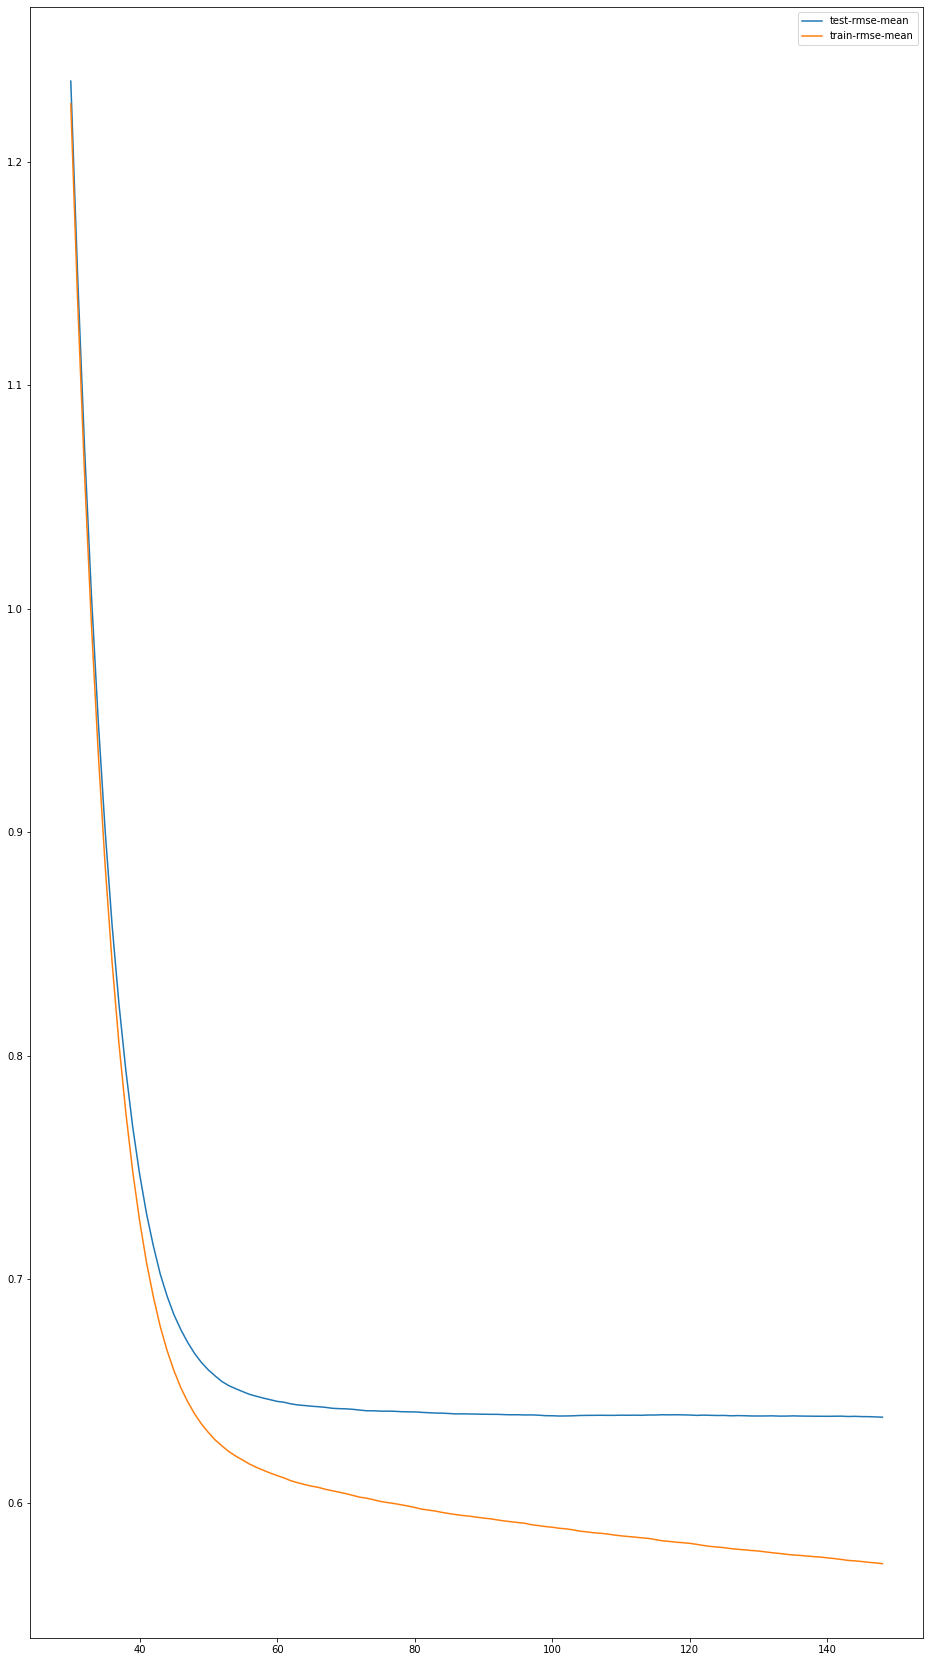

In [78]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [79]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)
xgb_pred = model_xgb.predict(X_test)

In [80]:
print("== XGBoost model ==")
evaluation(y_test, xgb_pred)

== XGBoost model ==
Mean Square Error: 0.867
Root Mean Square Error: 0.931
Mean Absolute Error: 0.695
R2 score: 0.747


### 6.5 Hyperparameter tuning 

In [81]:
from sklearn.model_selection import GridSearchCV

#### a. SVR with rbf kernel: Optimize with sufficiently large `C` and low `gamma`

In [82]:
rbf_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVR(), rbf_grid, refit = True, verbose = 3, cv=3)
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 2/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 3/3] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV 1/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV 2/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV 3/3] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV 1/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV 2/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV 3/3] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV 1/3] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.6s
[CV 2/3] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.5s
[CV 3/3] END .................C=0.1, gamma=0.001

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [83]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=100, gamma=0.0001)


In [84]:
grid_predictions = grid.predict(X_test) 
print("== Optimal SVM with rbf kernel ==")
print(evaluation(y_test, grid_predictions))

== Optimal SVM with rbf kernel ==
Mean Square Error: 0.805
Root Mean Square Error: 0.897
Mean Absolute Error: 0.660
R2 score: 0.765
None


#### b. SVR with polynomial kernel: Optimize with sufficiently large `C` and low `degree` 

In [85]:
poly_grid = {'C': [1, 10, 100, 1000, 10000], 
             'degree': [2, 3, 4, 5, 6],
               'kernel': ['poly']}

grid = GridSearchCV(SVR(), poly_grid, refit = True, verbose = 3, cv=3)    
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END .....................C=1, degree=2, kernel=poly; total time=   0.3s
[CV 2/3] END .....................C=1, degree=2, kernel=poly; total time=   0.3s
[CV 3/3] END .....................C=1, degree=2, kernel=poly; total time=   0.3s
[CV 1/3] END .....................C=1, degree=3, kernel=poly; total time=   0.3s
[CV 2/3] END .....................C=1, degree=3, kernel=poly; total time=   0.3s
[CV 3/3] END .....................C=1, degree=3, kernel=poly; total time=   0.3s
[CV 1/3] END .....................C=1, degree=4, kernel=poly; total time=   0.3s
[CV 2/3] END .....................C=1, degree=4, kernel=poly; total time=   0.3s
[CV 3/3] END .....................C=1, degree=4, kernel=poly; total time=   0.3s
[CV 1/3] END .....................C=1, degree=5, kernel=poly; total time=   0.3s
[CV 2/3] END .....................C=1, degree=5, kernel=poly; total time=   0.3s
[CV 3/3] END .....................C=1, degree=5,

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']},
             verbose=3)

In [86]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10000, 'degree': 6, 'kernel': 'poly'}
SVR(C=10000, degree=6, kernel='poly')


In [87]:
grid_predictions = grid.predict(X_test) 
print("== Optimal SVM with polynomial kernel ==")
print(evaluation(y_test, grid_predictions))

== Optimal SVM with polynomial kernel ==
Mean Square Error: 0.820
Root Mean Square Error: 0.906
Mean Absolute Error: 0.662
R2 score: 0.761
None


# 7. References
- [Threshold for Pearson correlation coefficient](https://link.springer.com/article/10.1057/jt.2009.5#:~:text=%E2%88%921%20indicates%20a%20perfect%20negative,through%20an%20exact%20linear%20rule.&text=Values%20between%200%20and%200.3,through%20a%20shaky%20linear%20rule.)
- [Pandas Resample Documentation](https://stackoverflow.com/questions/17001389/pandas-resample-documentation)
- [Modelling with SVM](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/svm/plot_svm_regression.html)
- [Hyperparameter tuning](https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/)
- [RBF Kernel](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)
- [Skewness minimization](https://github.com/data-doctors/kaggle-house-prices-advanced-regression-techniques/blob/master/02-cleaning/02-preprocessing.ipynb)
- [Split train and test time series data](https://community.dataquest.io/t/how-to-split-time-series-data-into-training-and-test-set/4116/2)